# Principal Component Analysis

In [196]:
%matplotlib notebook

In [197]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [198]:
sns.set(style='white')

In [199]:
d1 = pd.read_csv('data/data1.csv', sep=';', header=None)
print('rows, columns:', d1.shape)
d1.head()

rows, columns: (45294, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,745.7500
1,3.3165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,6.8596
2,3.1165,3.2245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,963.6320
3,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.6056,0.8631,0.7774,0.0605,0.4959,0.2765,16.6728
4,3.1165,3.0245,2.5679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,436.2930


In [200]:
n = 13  # number of inputs
input_indices = list(range(n))
x = d1[input_indices]
y = d1[n]

In [201]:
pca = PCA(n_components=3)
x_reduced = pd.DataFrame(pca.fit_transform(x))

In [202]:
print('rows, columns:', x_reduced.shape)
print('principal components:', pca.components_)
x_reduced.head()

rows, columns: (45294, 3)
principal components: [[ 0.97967671 -0.01141517 -0.04243101 -0.02972266 -0.05067792  0.11648167
  -0.03929353 -0.07062242  0.01083162 -0.08403049 -0.05129785 -0.06944492
   0.01091607]
 [ 0.13862607  0.30127926  0.32793795  0.50942608  0.3313822  -0.1645847
   0.18030473  0.2904765   0.3636448   0.2982717   0.09231969  0.19830397
  -0.01075999]
 [ 0.04946436 -0.39304074  0.23598092 -0.27440934  0.55984262 -0.05208447
  -0.21233599  0.1204589  -0.23639453  0.41750825 -0.16210889 -0.21394347
  -0.18467455]]


,0,1,2
0,1.366106,0.848025,0.108172
1,1.562041,0.875751,0.118065
2,1.363823,0.908281,0.029564
3,1.351981,0.906121,0.132264
4,1.357619,0.913613,0.155368


In [203]:
print('Percentage of variance explained by: 1.PC: {0:.0f} %, 2.PC: {1:.0f} %, 3.PC: {2:.0f} %'.format(*(100 * pca.explained_variance_ratio_)))

Percentage of variance explained by: 1.PC: 42 %, 2.PC: 11 %, 3.PC: 10 %


In [204]:
x_onePC = x_reduced.ix[:,0]
x_twoPCs = x_reduced.ix[:,0:1]
x_threePCs = x_reduced

## PCA with one component

<IPython.core.display.Javascript object>


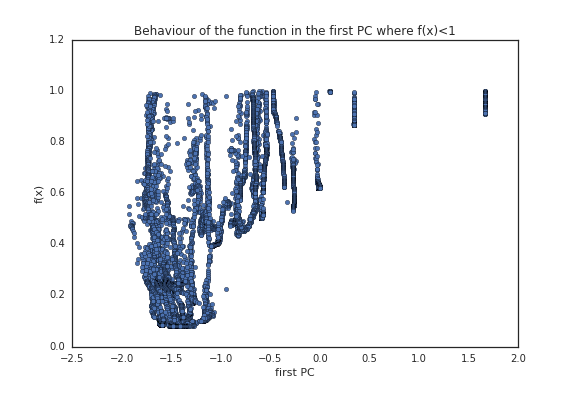

In [205]:
d = pd.concat([x_onePC, y], axis=1)[y<1]
d.columns = ['x1', 'y']
ax = d.plot.scatter(x='x1', y='y', )
ax.set(xlabel="first PC", ylabel="f(x)")
ax.set_title('Behaviour of the function in the first PC where f(x)<1')

plt.show()

Pokud tranformujeme data do první PC komponenty, je vidět zřejmý nárůst funkční hodnoty při zachování směru první PC komponenty. V datech jsou často skupiny bodů, které se liší pouze malou změnou vstupních hodnot a malou změnou funkčních hodnot. Z tohoto grafu nepoznáme, o které proměnné se jedná, ale můžeme od sebe odlišit a identifikovat skupiny.

<IPython.core.display.Javascript object>


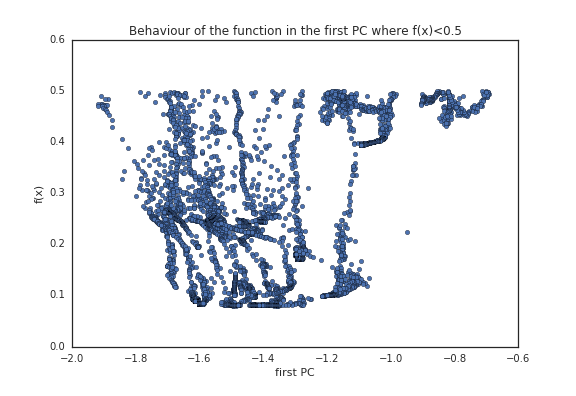

In [206]:
d = pd.concat([x_onePC, y], axis=1)[y<0.5]
d.columns = ['x1', 'y']
ax = d.plot.scatter(x='x1', y='y', )
ax.set(xlabel="first PC", ylabel="f(x)")
ax.set_title('Behaviour of the function in the first PC where f(x)<0.5')
plt.show()

Pod funkční hodnotou 0.5 se dají pozorovat oblouky připomínající paraboly natočené na různé směry.

## PCA with two components

In [207]:
x_twoPCs = x_reduced.ix[:,0:1]
d = pd.concat([x_twoPCs, y], axis=1)
d.columns = ['PC1', 'PC2', 'y']
d.head()

,PC1,PC2,y
0,1.366106,0.848025,745.7500
1,1.562041,0.875751,6.8596
2,1.363823,0.908281,963.6320
3,1.351981,0.906121,16.6728
4,1.357619,0.913613,436.2930


### Scatter Plot

<IPython.core.display.Javascript object>


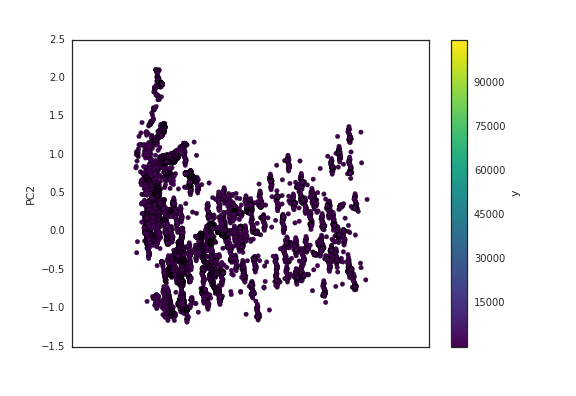

In [208]:
d.plot.scatter(x='PC1', y='PC2', c='y', cmap='viridis');

Příliš mnoho bodů přes sebe, není nic vidět. Těch pár vysokých bodů je zcela zakryto těmi malými. Řešením je hexbin plot!

### Hexbin Plot

<IPython.core.display.Javascript object>


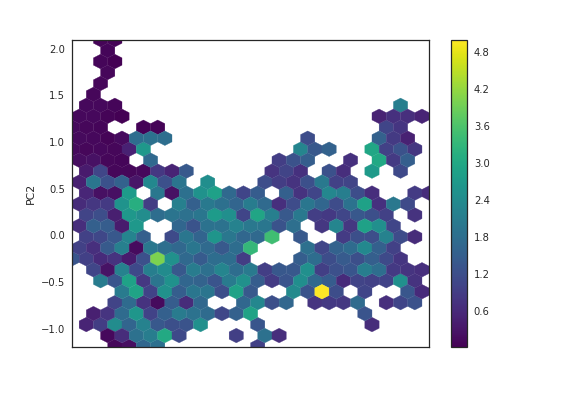

<function __main__.plot_hexbin>

In [209]:
def plot_hexbin(gridsize, logscale, maximum):
    d.plot.hexbin(x='PC1', y='PC2', C='y',
                  bins='log' if logscale else None,
                  gridsize=gridsize,
                  reduce_C_function=np.max if maximum else np.mean,
                  cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization

### 3D plot

<IPython.core.display.Javascript object>


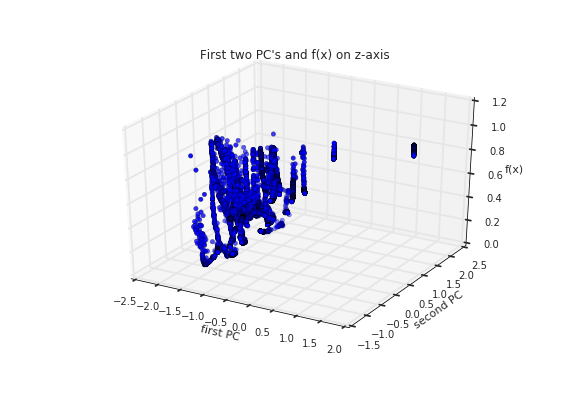

In [189]:
y_lim = 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_twoPCs[0][y<y_lim], x_twoPCs[1][y<y_lim], y[y<y_lim])


ax.set_xlabel('first PC')
ax.set_ylabel('second PC')
ax.set_zlabel('f(x)')
ax.set_title('First two PC\'s and f(x) on z-axis')

plt.show()

## PCA with three components

<IPython.core.display.Javascript object>


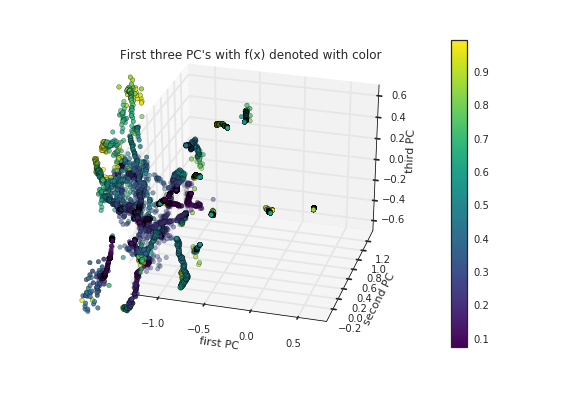

In [210]:
y_lim = 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter(x_threePCs[0][y<y_lim], x_threePCs[1][y<y_lim], x_threePCs[2][y<y_lim], c=y[y<y_lim], cmap='viridis')
fig.colorbar(plot)

ax.set_xlabel('first PC')
ax.set_ylabel('second PC')
ax.set_zlabel('third PC')
ax.set_title('First three PC\'s with f(x) denoted with color')

plt.show()